In [115]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] =200

with open('epochs_test.txt', 'r') as out:
    out = out.readlines()
    

In [105]:
epochs, loss, std, l2, l2_std = [], [], [], [], []
for x in out:
    x = x.split()
    if len(x) < 1:
        continue
    if x[0] == 'Epochs:':
        epochs.append(int(x[1]))
    if x[0] == 'loss:':
        loss.append(float(x[1]))
    if x[0] == 'Std':
        std.append(float(x[-1]))
    if x[0] == 'RMSD:':
        l2.append(float(x[1]))
        l2_std.append(float(x[3]))

Text(0, 0.5, 'RMSD Valid set')

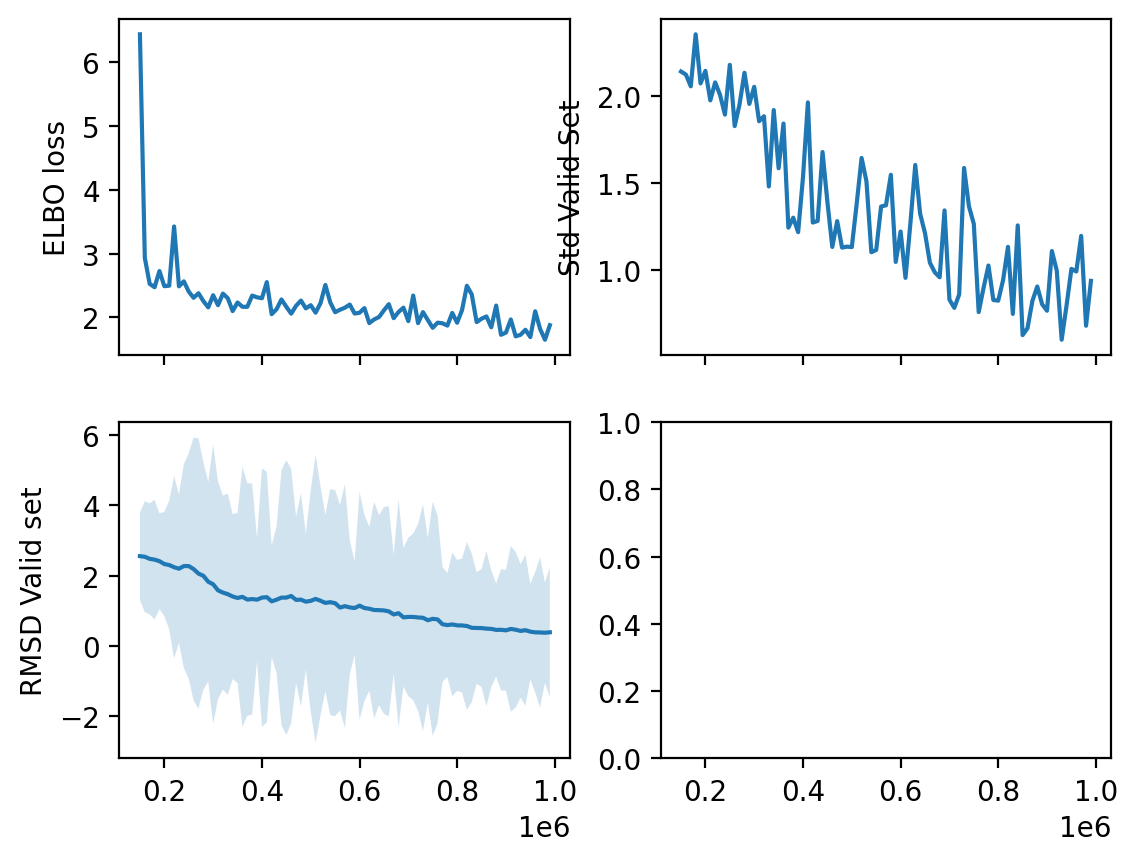

In [121]:
fig, ax = plt.subplots(2,2, sharex=True)

ax[0,0].plot(epochs, loss)
ax[0,1].plot(epochs, std)
ax[1,0].plot(epochs, l2)
ax[1,0].fill_between(epochs, np.array(l2) - np.array(l2_std), np.array(l2) + np.array(l2_std), alpha=0.2)
#ax[1,1].plot(epochs, l2_std)

ax[0,0].set_ylabel('ELBO loss')
ax[0,1].set_ylabel('Std Valid Set')
ax[1,0].set_ylabel('RMSD Valid set')
ax[1,0].set_xlabel('Epochs')
ax[0,1].set_xlabel('Epochs')

fig.delaxes(ax[1,1])

In [79]:
with open('nn_num_test.txt', 'r') as out:
    out = out.readlines()

In [96]:
num_samples, means, stds = [], [], []
for x in out:
    x = x.split()
    if len(x) < 1:
        continue
    if x[0] == 'Number':
        num_samples.append(int(x[-1]))
    if x[0] == 'Mean' and x[2] == 'obs:':
        means.append(float(x[-1]))
    if x[0] == 'STD' and x[1] == 'obs:':
        stds.append(float(x[-1]))

means_obs, stds_obs, means_return, stds_return = [], [], [], []

for i in range(0,len(means),2):
    means_obs.append(means[i])
    means_return.append(means[i+1])

for i in range(0,len(stds),2):
    stds_obs.append(stds[i])
    stds_return.append(stds[i+1])

Text(0.5, 0, 'Number of Neaural Networks')

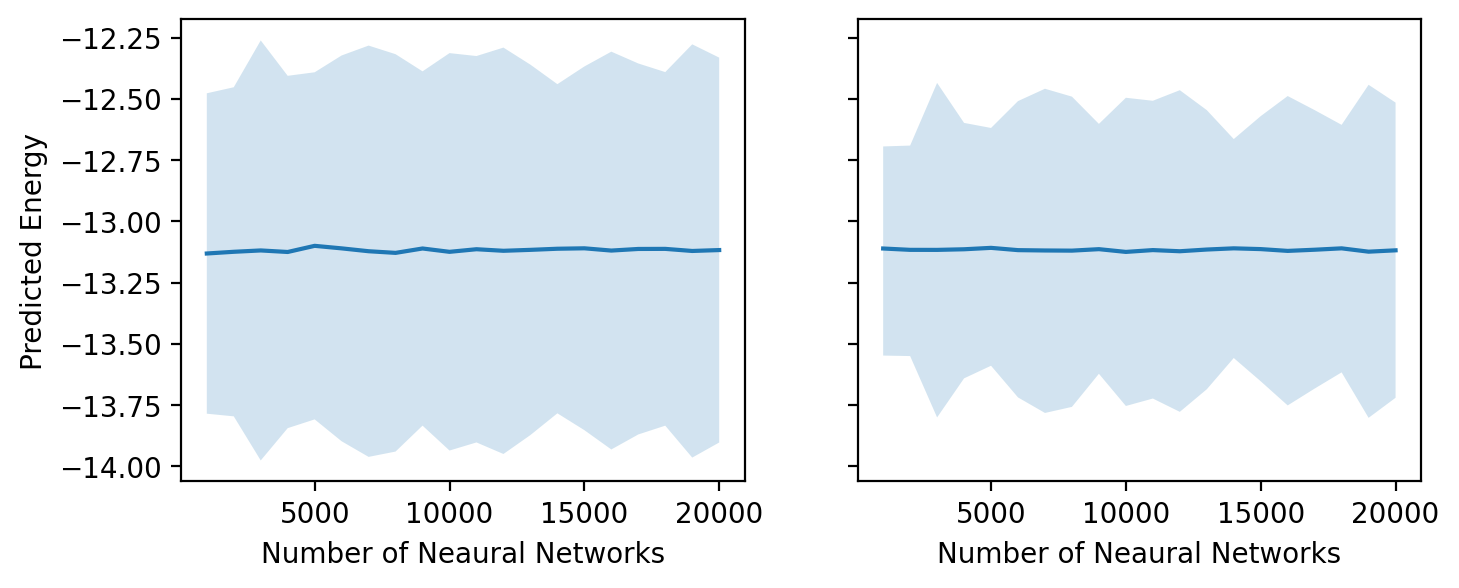

In [120]:
fig, ax = plt.subplots(1,2, sharex=True,sharey='row',figsize=(8,3))

ax[0].plot(num_samples, means_obs)
ax[0].fill_between(num_samples, np.array(means_obs) - np.array(stds_obs), np.array(means_obs) + np.array(stds_obs), alpha=0.2)
ax[1].plot(num_samples, means_return)
ax[1].fill_between(num_samples, np.array(means_obs) - np.array(stds_return), np.array(means_return) + np.array(stds_return), alpha=0.2)

ax[0].set_ylabel('Predicted Energy')
ax[0].set_xlabel('Number of Neaural Networks')
ax[1].set_xlabel('Number of Neaural Networks')
# ax[1,0].plot(num_samples, stds_obs)
# ax[1,1].plot(num_samples, stds_return)
